In [1]:
import pandas as pd
import cornac
import warnings
warnings.filterwarnings('ignore')
from cornac.data import Dataset,Reader
from cornac.models import SVD
from cornac.eval_methods import RatioSplit
from cornac.metrics import RMSE, MAE, Precision, Recall
from cornac.eval_methods import CrossValidation


In [2]:
movies = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
print(movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [35]:
print(movies['id'].unique())


[   862   8844  15602 ...  67758 227506 461257]


In [4]:

print(ratings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1048575 non-null  int64  
 1   movieId  1048575 non-null  int64  
 2   rating   1048575 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB
None


In [5]:
print(movies.head())


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [6]:
print(ratings.head())


   userId  movieId  rating
0       1      110     1.0
1       1      147     4.5
2       1      858     5.0
3       1     1221     5.0
4       1     1246     5.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
print(ratings.describe())

             userId       movieId        rating
count  1.048575e+06  1.048575e+06  1.048575e+06
mean   5.378787e+03  1.615889e+04  3.537035e+00
std    3.064842e+03  3.126738e+04  1.045203e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    2.728000e+03  1.080000e+03  3.000000e+00
50%    5.383000e+03  2.642000e+03  3.500000e+00
75%    8.060000e+03  6.643000e+03  4.000000e+00
max    1.065600e+04  1.762710e+05  5.000000e+00


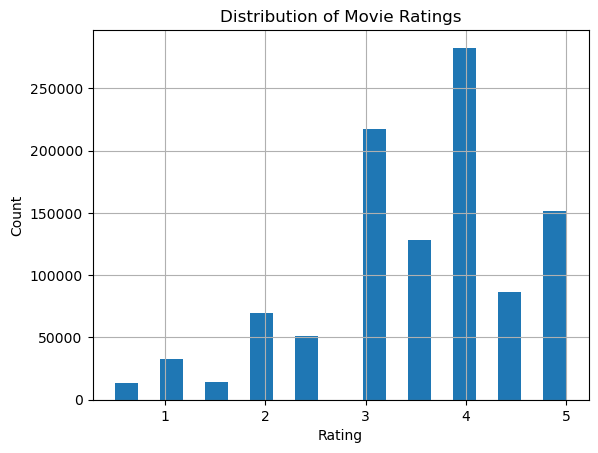

In [25]:
ratings['rating'].hist(bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


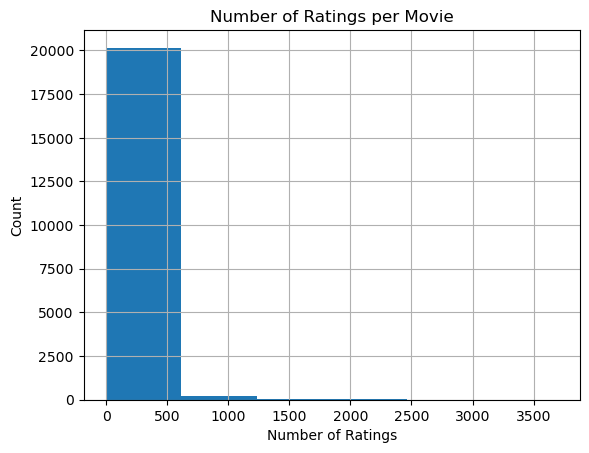

In [26]:
ratings_per_movie = ratings.groupby('movieId').count()['rating']
ratings_per_movie.hist(bins=6)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

In [27]:
ratings['userId'] = ratings['userId'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)

In [28]:



data = ratings[['userId', 'movieId', 'rating']].values.tolist()

# Create an evaluation method (e.g., split into training and testing)
eval_method = RatioSplit(data=data, test_size=0.2, exclude_unknowns=True, verbose=True)


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 10616
Number of items = 19133
Number of ratings = 838860
Max rating = 5.0
Min rating = 0.5
Global mean = 3.5
---
Test data:
Number of users = 10616
Number of items = 19133
Number of ratings = 208182
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 10616
Total items = 19133


In [29]:
svd = SVD(k=10, max_iter=50, learning_rate=0.01, lambda_reg=0.1)
svd.fit(eval_method.train_set)

In [30]:
user_id = 1
item_id = 110
predicted_rating = svd.score(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating}")


Predicted rating for user 1 and item 110: 3.6880280175596796


In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1048575 non-null  int32  
 1   movieId  1048575 non-null  int32  
 2   rating   1048575 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 16.0 MB


In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int32  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

In [33]:
def recommend_top_n_movies(user_id, num_recommendations=10):
  
    global svd, movies, ratings
    ratings['movieId'] = ratings['movieId'].astype(int)
    ratings['userId'] = ratings['userId'].astype(int)
    movies['id'] = movies['id'].astype(int)

    # Get the list of all movie IDs
    all_movie_ids = movies['id'].unique()
    
    # Get the list of movies already rated by the user
    rated_movies = ratings[ratings['userId'] == user_id]['movieId'].unique()
    
    # Filter out movies already rated by the user
    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies]
    
    # Predict ratings for the remaining movies
    predictions = []
    for movie_id in movies_to_predict:
        try:
            predicted_rating = svd.score(user_id, movie_id)
            predictions.append((movie_id, predicted_rating))
        except:
            # Ignore movies that cannot be scored
            pass
    
    # Sort predictions by predicted rating in descending order
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    
    # Get the top N movie IDs
    top_n_movie_ids = [movie_id for movie_id, _ in predictions[:num_recommendations]]
    
    # Fetch movie details for the top N movies
    top_n_movies = movies[movies['id'].isin(top_n_movie_ids)]
    
    # Add predicted ratings to the recommendations
    top_n_movies = top_n_movies.copy()
    top_n_movies['predicted_rating'] = top_n_movies['id'].map(
        dict(predictions)
    )
    
    return top_n_movies.sort_values(by='predicted_rating', ascending=False)


In [34]:
# Call the recommendation function for user 1 and get the top 10 recommendations
recommendations = recommend_top_n_movies(user_id=1, num_recommendations=10)

# Print recommendations in a readable format
print("Top 10 Recommended Movies:")
print(recommendations[['title', 'predicted_rating']])

Top 10 Recommended Movies:
                                          title  predicted_rating
45111                                   Trivial          5.106031
7230                                      Shade          5.010871
14007      Evangelion: 1.0: You Are (Not) Alone          4.853599
12891                      Let the Right One In          4.845743
17693                                 Walled In          4.833253
10029  The Private Lives of Elizabeth and Essex          4.828966
14758                                   Cabiria          4.789701
10145                        Happily Ever After          4.766703
7016                            Chasing Liberty          4.753594
6240                                Whale Rider          4.749028


In [ ]:
movies = movies[movies['id'].str.isdigit()]
movies['id'] = movies['id'].astype(int)


In [ ]:
non_numeric_ids = movies[~movies['id'].str.isdigit()]
print(non_numeric_ids)


In [ ]:
movies = movies[movies['id'].str.isdigit()]
movies['id'] = movies['id'].astype(int)


In [39]:
print(movies['id'].dtype)
print(movies.head())


int32
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497   

In [44]:
from flask import Flask, request, jsonify
app = Flask(__name__)
@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.get_json(force=True)
    user_id = data['user_id']
    num_recommendations = data.get('num_recommendations', 10)
    recommendations = recommend_top_n_movies(user_id, num_recommendations)
    return jsonify(recommendations.to_dict(orient='records'))
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1